In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anime-recommendations-database/rating.csv
/kaggle/input/anime-recommendations-database/anime.csv


In [2]:
df1=pd.read_csv("/kaggle/input/anime-recommendations-database/anime.csv")
df2=pd.read_csv("/kaggle/input/anime-recommendations-database/rating.csv")

In [3]:
df1.head(20)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [4]:
df2.head(20)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
5,1,355,-1
6,1,356,-1
7,1,442,-1
8,1,487,-1
9,1,846,-1


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#Adding the both df to understand it well
# Merge datasets on the 'anime_id' column
df_final = pd.merge(df1, df2, on='anime_id')

df_final.head(20)


,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10
6,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8
8,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,490,10
9,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,548,10


**OUTLIER REMOVAL**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


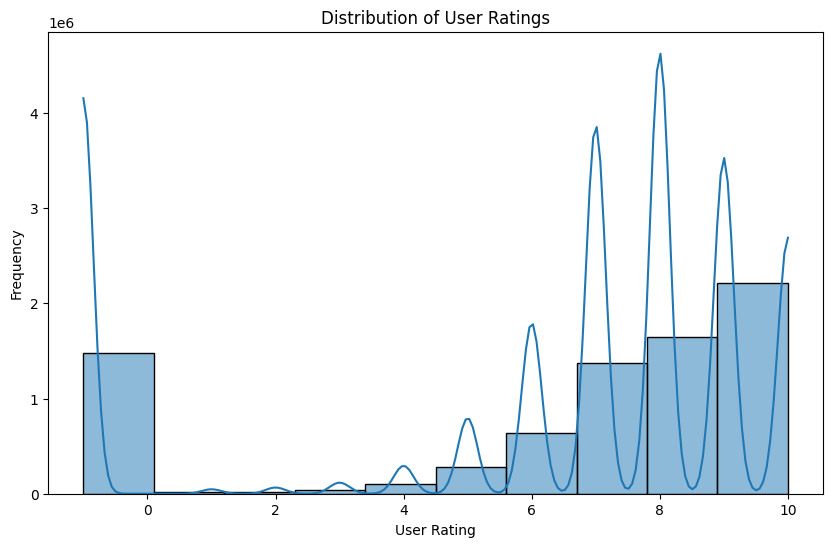

In [6]:
#Distribution of User Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_final['rating_y'], bins=10, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()


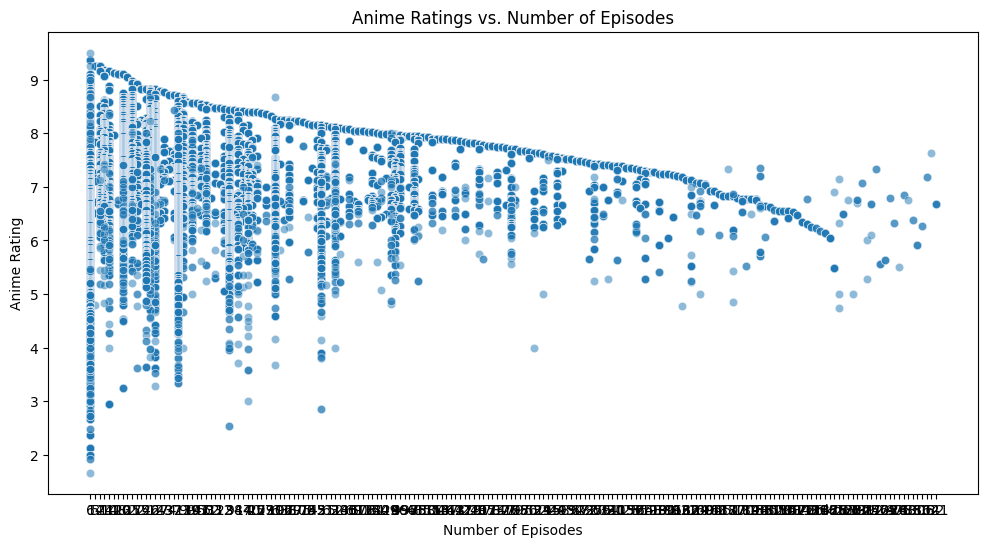

In [7]:
#Anime Ratings vs. Number of Episodes
plt.figure(figsize=(12, 6))
sns.scatterplot(x='episodes', y='rating_x', data=df_final, alpha=0.5)
plt.title('Anime Ratings vs. Number of Episodes')
plt.xlabel('Number of Episodes')
plt.ylabel('Anime Rating')
plt.show()

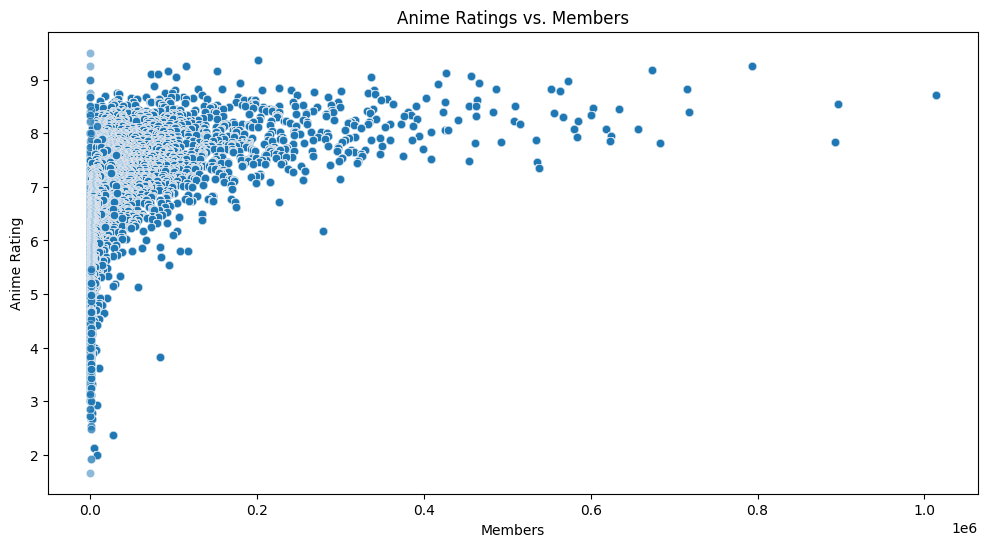

In [8]:
# Anime Ratings vs. Members
plt.figure(figsize=(12, 6))
sns.scatterplot(x='members', y='rating_x', data=df_final, alpha=0.5)
plt.title('Anime Ratings vs. Members')
plt.xlabel('Members')
plt.ylabel('Anime Rating')
plt.show()

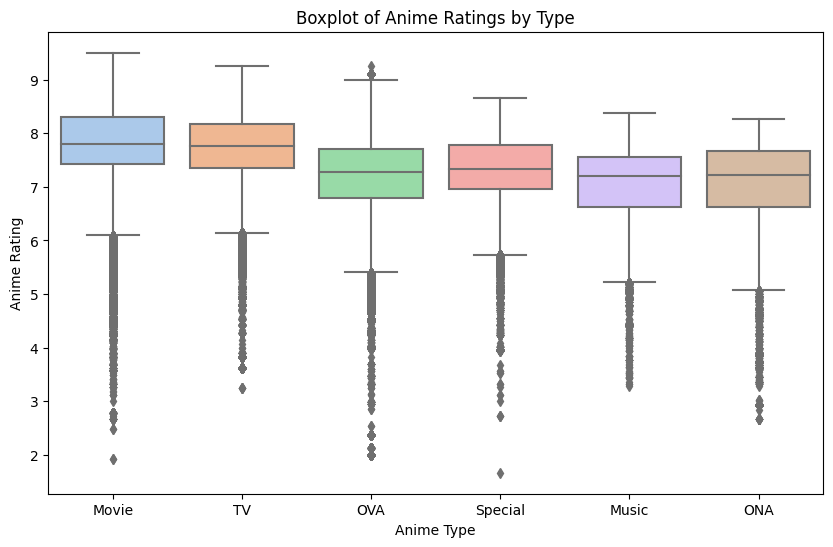

In [9]:
#Boxplot of Anime Ratings by type
plt.figure(figsize=(10,6))
sns.boxplot(x='type',y='rating_x',data=df_final,palette='pastel')
plt.title('Boxplot of Anime Ratings by Type')
plt.xlabel('Anime Type')
plt.ylabel('Anime Rating')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


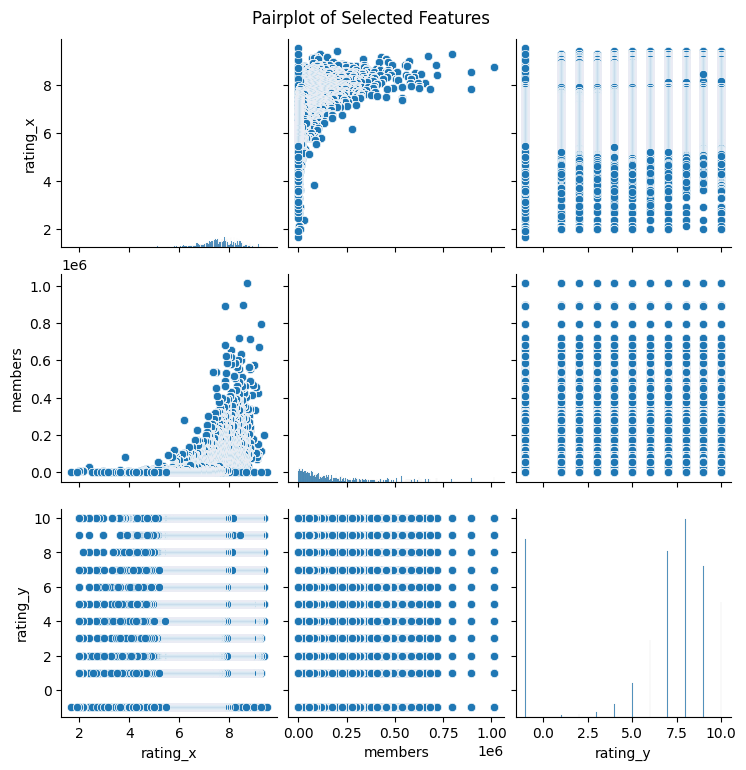

In [10]:
# Pairplot for selected features
sns.pairplot(df_final[['rating_x', 'episodes', 'members', 'rating_y']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

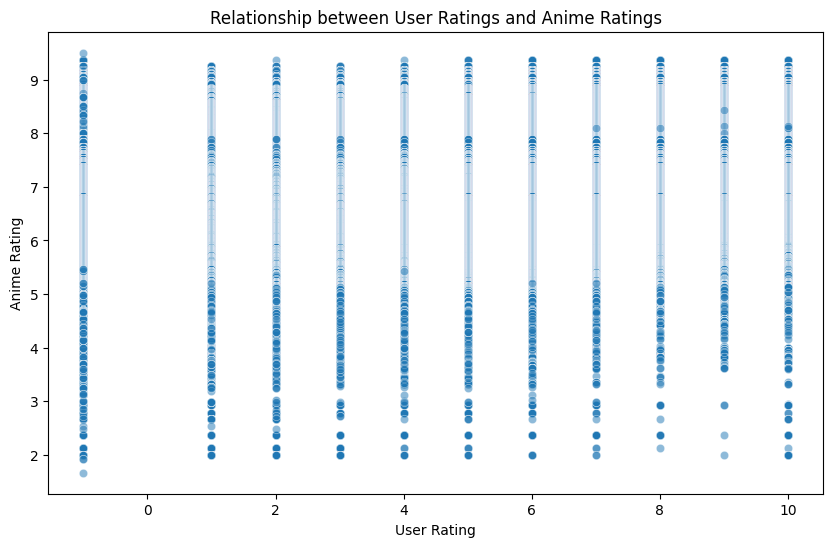

In [11]:
# Relationship between User Ratings and Anime Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating_y', y='rating_x', data=df_final, alpha=0.5)
plt.title('Relationship between User Ratings and Anime Ratings')
plt.xlabel('User Rating')
plt.ylabel('Anime Rating')
plt.show()


In [12]:
# Remove outliers using IQR method
Q1 = df_final['rating_x'].quantile(0.25)
Q3 = df_final['rating_x'].quantile(0.75)
IQR = Q3 - Q1

In [13]:
# Filter out values outside the IQR range
df_final_no_outliers = df_final[(df_final['rating_x'] >= Q1 - 1.5 * IQR) & (df_final['rating_x'] <= Q3 + 1.5 * IQR)]

In [14]:
df_final.shape                           #Before the Outlier Removal


(7813727, 9)

In [15]:
df_final_no_outliers.shape               #After the Outlier Removal

(7712524, 9)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


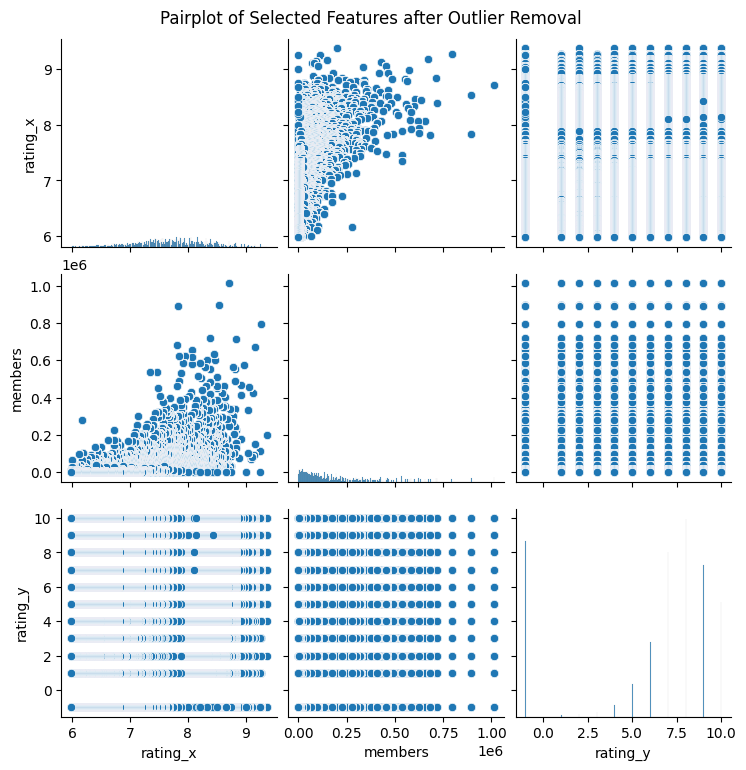

In [16]:
# Pairplot for selected features after outlier removal
sns.pairplot(df_final_no_outliers[['rating_x', 'episodes', 'members', 'rating_y']])
plt.suptitle('Pairplot of Selected Features after Outlier Removal', y=1.02)
plt.show()

**# This is my data visualization for this data set.If you want to add something like a machine learning model for prediction of rating using the column of members and no.of episode ,you can try it.**